보스턴 주택 가격 데이터셋 크기:  (506, 14)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  PRICE    506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB
MSE: 17.297, RMSE: 4.159
R^2(Variance score): 0.757
Y 절편 값:  40.9955951721644
회귀 계수 값:  [ -0.1   0.1   0.    3.  -19.8   3.4   0.   -1.7   0.4  -0.   -0.9   0.
  -0.6]


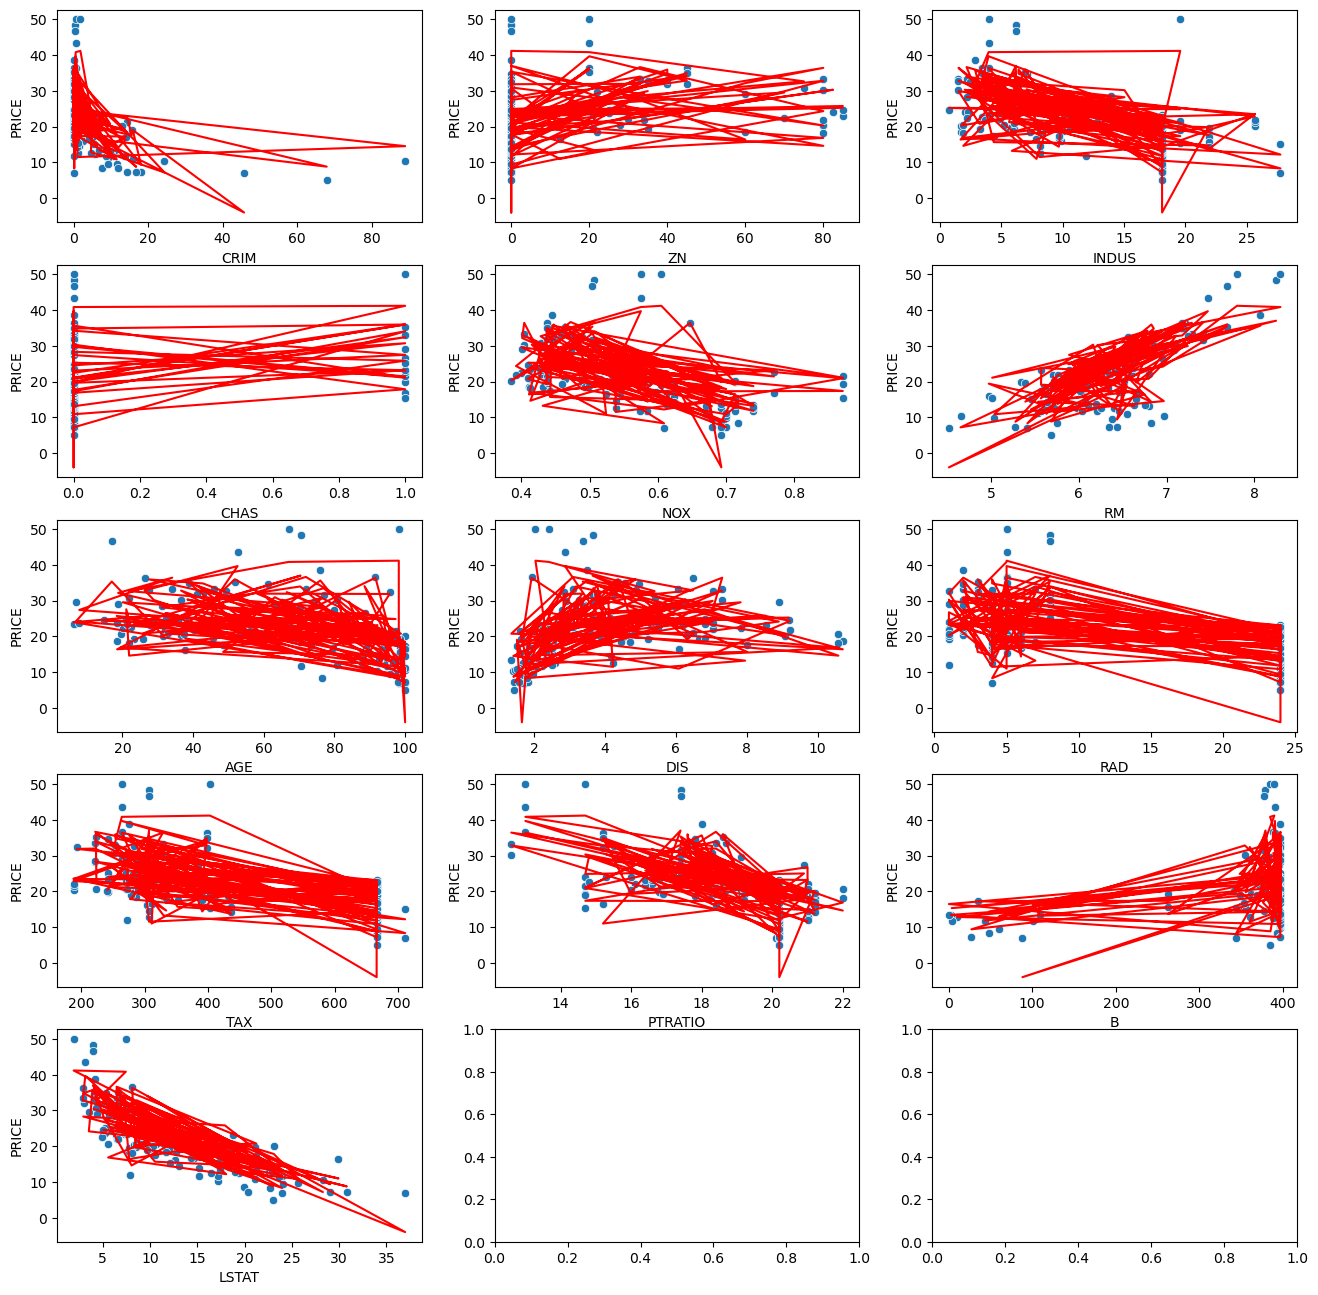

In [7]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

# 원본 데이터 다운로드 및 전처리
data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
target = raw_df.values[1::2, 2]

# 데이터프레임 생성
boston_df = pd.DataFrame(data, columns=["CRIM", "ZN", "INDUS", "CHAS", "NOX", "RM", "AGE", "DIS", "RAD", "TAX", "PTRATIO", "B", "LSTAT"])
boston_df['PRICE'] = target

# 데이터 정보 확인
print('보스턴 주택 가격 데이터셋 크기: ', boston_df.shape)
boston_df.info()

# 데이터 분할
X = boston_df.drop(['PRICE'], axis=1)
Y = boston_df['PRICE']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=156)

# 선형 회귀 모델 학습 및 예측
lr = LinearRegression()
lr.fit(X_train, Y_train)
Y_predict = lr.predict(X_test)

# 모델 성능 평가
mse = mean_squared_error(Y_test, Y_predict)
rmse = np.sqrt(mse)
r2 = r2_score(Y_test, Y_predict)

print('MSE: {0:.3f}, RMSE: {1:.3f}'.format(mse, rmse))
print('R^2(Variance score): {0:.3f}'.format(r2))
print('Y 절편 값: ', lr.intercept_)
print('회귀 계수 값: ', np.round(lr.coef_, 1))

# 회귀 계수 시각화
coef = pd.Series(data=np.round(lr.coef_, 2), index=X.columns)
coef = coef.sort_values(ascending=False)

fig, axs = plt.subplots(figsize=(16, 16), ncols=3, nrows=5)

x_features = ["CRIM", "ZN", "INDUS", "CHAS", "NOX", "RM", "AGE", "DIS", "RAD", "TAX", "PTRATIO", "B", "LSTAT"]

for i, feature in enumerate(x_features):
    row = int(i / 3)
    col = i % 3

    # 산점도 그리기
    sns.scatterplot(x=X_test[feature], y=Y_test, ax=axs[row][col])

    # 회귀선 그리기
    axs[row][col].plot(X_test[feature], lr.predict(X_test), color='red')

plt.show()
